# Lab 2 - W203 - Statistics for Data Science

#### Submission by Jude Kavalam, Harshit Patel, Abhi Sharma

## 1. Introduction

### Dataset

The database contains only a subset of information drawn from a larger multi-year database from a study
performed by Cornwell and Trumball researchers from the University of Georgia and the West Virginia University
(CT1994). From the database the subset of twenty five variables encompass roughly three types of variables,
penal system, economic and population related variables. Each observation is from a different county in North
Carolina. Currently there are 100 counties in North Carolina, the study appears to encompass 97 of those
counties.

### Background

There are 3 classes of variables provided to us:
1. Labor market variables
2. Criminal justice variables
3. Demographic variables

Both labor market and criminal justice strategies should be relevant in influencing (causing causal behavior on) crime rate. 

In our study, we are given variables that reflect both these factors:<br/>
**Variables reflecting labor markets**

10 taxpc - tax revenue per capita <br/>
15 wcon - weekly wage, construction <br/>
16 wtuc	- wkly wge, trns, util, commun <br/>
17 wtrd	- wkly wge, whlesle, retail trade <br/>
18 wfir	- wkly wge, fin, ins, real est <br/>
19 wser	- wkly wge, service industry <br/>
20 wmfg	- wkly wge, manufacturing <br/>
21 wfed	- wkly wge, fed employees <br/>
22 wsta	- wkly wge, state employees <br/>
23 wloc	- wkly wge, local gov emps <br/>

**Variables reflecting criminal justice system**

4 prbarr - 'probability' of arrest <br/>
5 prbconv - 'probability' of conviction <br/>
6 prbpris - 'probability' of prison sentence <br/>
7 avgsen - avg. sentence, days <br/>
8 polpc - police per capita <br/>
24 mix - offense mix: face-to-face/other <br/>

There is a third class of variables that represents the demographic characteristics of the data. We expect some of these variables to have a causal effect on crime rate (say pctymle or pctmin80), but others to not intrinsically have causal effects on crime rate (say west, central, county).

These variables can also possibly influence the "labor market" and "criminal justice system" variables:<br/>

**Variables reflecting demographic characteristics**

1 county - county identifier <br/>
9 density - people per sq. mile <br/>
11 west - =1 if in western N.C. <br/>
12 central - =1 if in central N.C. <br/>
13 urban - =1 if in SMSA <br/>
14 pctmin80 - perc. minority, 1980 <br/>
25 pctymle - percent young male <br/>

## 2. Research Question

We are interested in understanding the relationship of crime that may be caused by these 3 classes of variables (or their interactions). We are looking to see if any one class of variables is dominant in deciding crime rate in the area. Based on the variables we do identify, there may be different sets of implications for the local government from a policy perspective. For example, if we determine "criminal justice" variables are primarily responsible for crime rate, then our recommendations may be to change certain pre and post conviction policies to curb crime. If, on the other hand the "labor market" variables are primarily causing crime, that may prompt government response to create more jobs in a certain industry, for example. Its also possible that more than 1 class of variables may be at play here.  

## 3. Operationalization of Model Specification

Our chosen target variable is "crmrate", and we're trying to understand what affects this variable (or a transform of this variable).

Note that we are choosing crime rate as our target variable with the intention to predict crime rate from the data. This is consistent with previous research that has been done

https://www.amherst.edu/media/view/121570/original/CornwellTrumbullCrime%2BElasticities.pdf

We could have argued to choose prbarr, prbconv, or prbpris as our target variables and chosen crmrate as our predictor. This is because we **CANNOT assume the direction of causality between crime rate and  eg. probability of getting arrested (prbarr)**. We can argue that an increased crime rate causes an increase in probability of arrests, just as well as arguing that prbarr causes crime rate. For now, we will choose some transformation of crime rate as our target variable.

For independent variables, we will do a thorough EDA on all classes of variables to understand which variables to include in the model. We will also consider certain interaction variables to create intuitive metrics that may inform crime.

## 4. Data Loading and Cleaning

In [1]:
install.packages("dplyr")
library(dplyr)
install.packages("car")
library(car)
install.packages("lmtest")
library(lmtest)
install.packages("sandwich")
library(sandwich)
install.packages("corrplot")
library(corrplot)
install.packages("stargazer")
library(stargazer)
install.packages("curl")
library(curl)
install.packages("data.table")
library(data.table)
install.packages("haven")
library(haven)
install.packages("readxl")
library(readxl)
install.packages("ggplot2")
library(ggplot2)
install.packages("corrplot")
library(corrplot)
install.packages("GGally")
library(GGally)
# set standard height and width for images displayed
options(repr.plot.width=5, repr.plot.height=5)


package 'dplyr' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\abhisha.REDMOND\AppData\Local\Temp\RtmpauPboL\downloaded_packages


Warning message:
"package 'dplyr' was built under R version 3.6.3"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



package 'car' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\abhisha.REDMOND\AppData\Local\Temp\RtmpauPboL\downloaded_packages


Warning message:
"package 'car' was built under R version 3.6.3"Loading required package: carData

Attaching package: 'car'

The following object is masked from 'package:dplyr':

    recode



package 'lmtest' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\abhisha.REDMOND\AppData\Local\Temp\RtmpauPboL\downloaded_packages


Warning message:
"package 'lmtest' was built under R version 3.6.3"Loading required package: zoo

Attaching package: 'zoo'

The following objects are masked from 'package:base':

    as.Date, as.Date.numeric



package 'sandwich' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\abhisha.REDMOND\AppData\Local\Temp\RtmpauPboL\downloaded_packages


Warning message:
"package 'sandwich' was built under R version 3.6.3"

package 'corrplot' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\abhisha.REDMOND\AppData\Local\Temp\RtmpauPboL\downloaded_packages


Warning message:
"package 'corrplot' was built under R version 3.6.3"corrplot 0.84 loaded


package 'stargazer' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\abhisha.REDMOND\AppData\Local\Temp\RtmpauPboL\downloaded_packages



Please cite as: 

 Hlavac, Marek (2018). stargazer: Well-Formatted Regression and Summary Statistics Tables.
 R package version 5.2.2. https://CRAN.R-project.org/package=stargazer 



package 'curl' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'curl'"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Users\abhisha.REDMOND\AppData\Local\Continuum\anaconda3\envs\r-env\Lib\R\library\00LOCK\curl\libs\x64\curl.dll to C:\Users\abhisha.REDMOND\AppData\Local\Continuum\anaconda3\envs\r-env\Lib\R\library\curl\libs\x64\curl.dll: Permission denied"Warning message:
"restored 'curl'"


The downloaded binary packages are in
	C:\Users\abhisha.REDMOND\AppData\Local\Temp\RtmpauPboL\downloaded_packages
package 'data.table' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'data.table'"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Users\abhisha.REDMOND\AppData\Local\Continuum\anaconda3\envs\r-env\Lib\R\library\00LOCK\data.table\libs\x64\datatable.dll to C:\Users\abhisha.REDMOND\AppData\Local\Continuum\anaconda3\envs\r-env\Lib\R\library\data.table\libs\x64\datatable.dll: Permission denied"Warning message:
"restored 'data.table'"


The downloaded binary packages are in
	C:\Users\abhisha.REDMOND\AppData\Local\Temp\RtmpauPboL\downloaded_packages



Attaching package: 'data.table'

The following objects are masked from 'package:dplyr':

    between, first, last



package 'haven' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'haven'"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Users\abhisha.REDMOND\AppData\Local\Continuum\anaconda3\envs\r-env\Lib\R\library\00LOCK\haven\libs\x64\haven.dll to C:\Users\abhisha.REDMOND\AppData\Local\Continuum\anaconda3\envs\r-env\Lib\R\library\haven\libs\x64\haven.dll: Permission denied"Warning message:
"restored 'haven'"


The downloaded binary packages are in
	C:\Users\abhisha.REDMOND\AppData\Local\Temp\RtmpauPboL\downloaded_packages


Warning message:
"package 'haven' was built under R version 3.6.3"

package 'readxl' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'readxl'"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Users\abhisha.REDMOND\AppData\Local\Continuum\anaconda3\envs\r-env\Lib\R\library\00LOCK\readxl\libs\x64\readxl.dll to C:\Users\abhisha.REDMOND\AppData\Local\Continuum\anaconda3\envs\r-env\Lib\R\library\readxl\libs\x64\readxl.dll: Permission denied"Warning message:
"restored 'readxl'"


The downloaded binary packages are in
	C:\Users\abhisha.REDMOND\AppData\Local\Temp\RtmpauPboL\downloaded_packages
package 'ggplot2' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\abhisha.REDMOND\AppData\Local\Temp\RtmpauPboL\downloaded_packages


Warning message:
"package 'ggplot2' was built under R version 3.6.3"Warning message:
"package 'corrplot' is in use and will not be installed"

package 'GGally' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\abhisha.REDMOND\AppData\Local\Temp\RtmpauPboL\downloaded_packages


Warning message:
"package 'GGally' was built under R version 3.6.3"Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2

Attaching package: 'GGally'

The following object is masked from 'package:dplyr':

    nasa



In [2]:
get_data = function() {
    wd = getwd()
    return (read.csv(paste(wd, "/", "crime_v2.csv", sep="")))    
}

In [7]:
data = get_data()
# head(data)

In [8]:
sapply(data, class)

county      year    crmrte    prbarr   prbconv   prbpris    avgsen     polpc 
"integer" "integer" "numeric" "numeric"  "factor" "numeric" "numeric" "numeric" 
  density     taxpc      west   central     urban  pctmin80      wcon      wtuc 
"numeric" "numeric" "integer" "integer" "integer" "numeric" "numeric" "numeric" 
     wtrd      wfir      wser      wmfg      wfed      wsta      wloc       mix 
"numeric" "numeric" "numeric" "numeric" "numeric" "numeric" "numeric" "numeric" 
  pctymle 
"numeric"

#### We notice there is a factor column for prbconv, we convert this to numeric, as has been done with prbarr and prbpris. We also observe that there are few missing values for prbconv. These will be removed later

In [10]:
data$prbconv = as.numeric(as.character(data$prbconv))

Warning message in eval(expr, envir, enclos):
"NAs introduced by coercion"

Notice that the 6 rows of NA values above are coming because prbconv is NA in those 6 rows

In [12]:
# we observe all values have NA in them
# remove data where there are NA in rows
data = data[complete.cases(data), ]

In [13]:
dim(data)

[1] 91 25

We observe we have removed the 6 rows and now we have 91 rows.

### Exploratory Data Analysis

### EDA Target Variable

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
0.005533 0.020927 0.029986 0.033400 0.039642 0.098966 

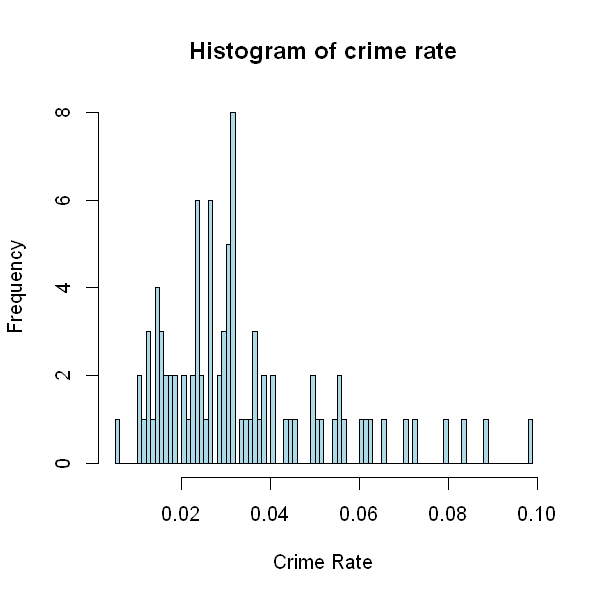

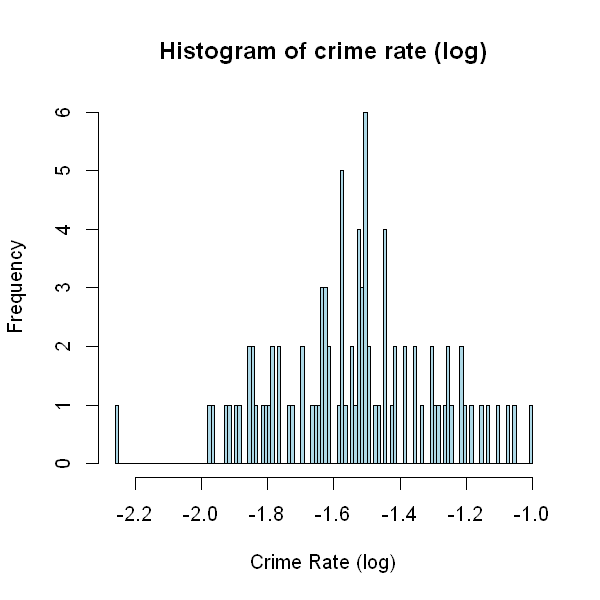

In [14]:
summary(data$crmrte)
hist(data$crmrte, breaks=100, main = "Histogram of crime rate", xlab = "Crime Rate", col = "lightblue", border = "black")
hist(log10(data$crmrte), breaks=100, main = "Histogram of crime rate (log)", xlab = "Crime Rate (log)", col = "lightblue", border = "black")

#### Note that if we take a log version of the crime rate, we get a nice normally distributed curve. Hence, we will consider our target variable to be log10(crmrte) 

In [37]:
data$y = log10(data$crmrte)

### EDA Geographical Variables (Demographic)

**One thing to consider would be to consider the effects of geography on crime rate.**

There are 3 variables which help us categorize geography - west, central and urban. These are all dummy variables that represent what region characteristics the data point has. Hence, one variable of interest could be an interaction variable: 

#### geo = west  x  central  x  urban

Note that because we include this new interaction variable, we have to include all lower order interactions as well.


In [16]:
data$geo = data$west * data$central * data$urban
data$west_central = data$west * data$central
data$west_urban = data$west * data$urban
data$central_urban = data$central * data$urban

# also include a variable to capture non urban, non west, non central region (west=0, central=0, urban=0)
geo_arr = data$west + data$central + data$urban
# hist(geo_arr, , breaks=100, main = "Histogram of Urban, Central, West Combo", xlab = "Sum(Urban, West, Central)", col = "lightblue", border = "black")
# notice there are over 30 counties that are non urban, non west, non central
data$non_urban_west_central = ifelse(geo_arr >= 1, 0, 1)

In [ ]:
# plot(data$urban, data$density, main = "Urban vs Population Density", xlab = "Urban", ylab = "Population Density" )

We don't have a hypothesis around geography, but one can make an argument that urban areas are more susceptible for crime, given that they may be more densely populated.

Also, we notice that there are no regions that are urban, west and central (see graph above for sum(urban, west, central)). There are also many areas (over 30 counties) that are neither urban, nor west nor central. This gives a basic idea of geographical characteristics of the region

In [ ]:
# sample EDA for the dummy variables
summary(data$urban)
unique(data$urban)

In [17]:
# Analysis of interaction term "geo"
paste("Urban:", sum(data$urban))
paste("West:", sum(data$west))
paste("Central:", sum(data$central))

paste("Central + West:", sum(data$central * data$west))
paste("Central + Urban:", sum(data$central * data$urban))
paste("Urban + West:", sum(data$urban * data$west))

paste("Urban + West + Central:", sum(data$urban * data$west * data$central))
paste("NON Urban + NON West + NON Central:", sum(data$non_urban_west_central))

[1] "Urban: 8"

[1] "West: 23"

[1] "Central: 34"

[1] "Central + West: 1"

[1] "Central + Urban: 5"

[1] "Urban + West: 1"

[1] "Urban + West + Central: 0"

[1] "NON Urban + NON West + NON Central: 33"

**For now, we will include the above variables in our model to observe if there are any special effects on crime based on geo**

### EDA Population Variables (Demographic)

**We decide to add 2 interaction variables:**
1. density x pctymle - this gives the density of young males in the county (density_ymle)
2. density x pctmin80 - this gives the density of minority in the county (density_min80)

These seem to be a good representation of the density of a population in the county, which is a more intuitive way to think about demography (people / unit area), rather than thinking in percentage terms only. Hence, we will add these variables into our discussion as well.

**Note that this assumes that the percentage variables are uniformly distributed over the county and that density x pct will give the density of the population of interest in the county.**

Also note that pctymle is already given in fractional terms (between 0 and 1), whereas pctmin80 is given in percentage (between 0 and 100). For sake of uniformity, we will convert pctmin80 to 0-1 scale

In [18]:
data$pctmin80 = data$pctmin80 * 1.0 / 100
# summary(data$pctmin80)

In [19]:
data$density_min80 = data$density * data$pctmin80 
data$density_ymle = data$density * data$pctymle

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.00002 0.54741 0.96226 1.42884 1.56824 8.82765 

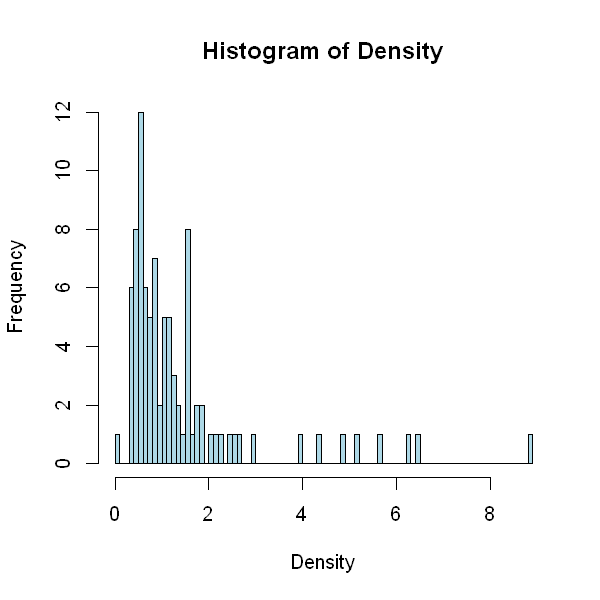

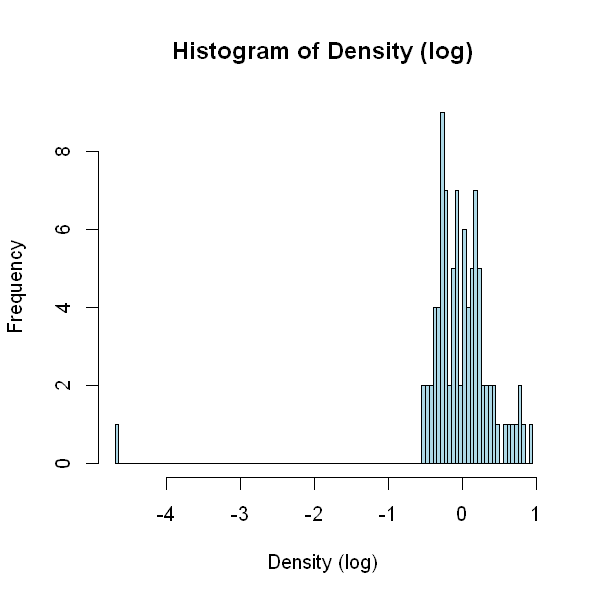

In [20]:
summary(data$density)
hist(data$density, , breaks=100, main = "Histogram of Density", xlab = "Density", col = "lightblue", border = "black")
hist(log10(data$density), , breaks=100, main = "Histogram of Density (log)", xlab = "Density (log)", col = "lightblue", border = "black")


Taking the log(Density) makes the data much more normal and is a better choice for our density variable. 

Doing a histogram of pctmin80 and pctymle (or their log transformations) - didnt reveal any interesting normal distributions. We notice that the values for the percentages lie within expected range (0 to 1) - see below. So we will continue to explore further.

Next lets do a correlation analysis on all the variables of population identified so far.

In [31]:
data$log10_density = log10(data$density)

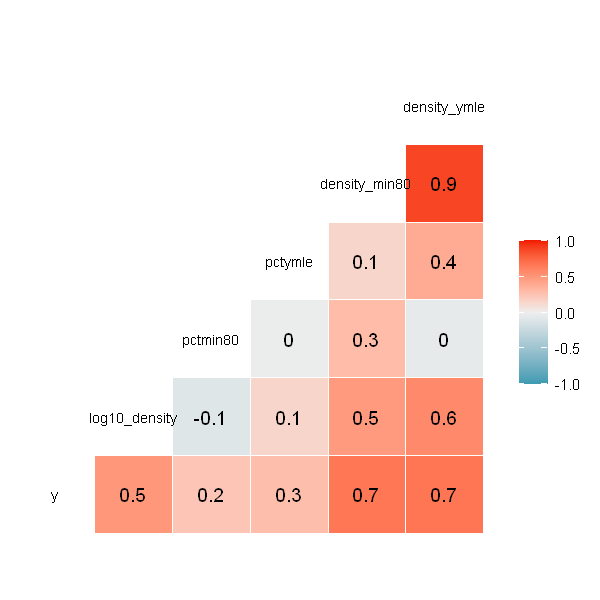

In [39]:
ggcorr(data[, c("y","log10_density", "pctmin80", "pctymle", "density_min80", "density_ymle")], size = 3, label=TRUE)

#### We observe strong positive correlation between several population variables

Here y is log10(crmrte)

Notably:
1. 0.39 between pctmin80 and density_ymale
2. 0.48 between pctymle and density_min80
3. 0.56 between pctymle and density_ymle
4. 0.88 between density_min80 and density_ymle

We will include these variables in our specifications with the following expected causal effects:
1. If density is high, then crime rate is expected to be high. This is simply because a larger set of people in one area is bound to create more conflict and crime in the community.
2. If percentage of young males are high in a region, we expect more crime. This is because younger people are easier to influence and may engage more in petty crimes.

There may be a concern including both density_min80 and density_ymle because they have high correlation (0.88) - leading to possible multicollinearity. This also shows that the density of younger male populations is highly correlated across counties with density of minority populations. Keep in mind, pctymle and pctmin80 are hardly correlated with each other. But their density equivalents (density_min80 and density_ymle) are highly correlated, which is an interesting observation. This could be because of the underlying common density variable in the interaction. For now, we will keep density_ymale in our model, as a measure of how many young males per unit area exist in each county. We will NOT include density_min80 because we are concerned about multicollinearity. To represent the minority percentage variable, we keep pctmin80 in the model.

**For now, we will include "log10(density)", "pctmin80" and "density_ymle" variables in the model to observe their effects**

### EDA Criminal Justice Variables

It is worthwhile to capture any relationships between these variables: prbarr, prbconv, prbpris.

This will help us determine if there is any multicollinearity between these variables. We would suspect these to be correlated

In [ ]:
# summary(data$prbpris)
# hist((data$prbpris), breaks=100, main = "Histogram of prbpris", xlab = "prbpris", col = "lightblue", border = "black")

In [ ]:
# summary(data$prbarr)
# hist((data$prbarr), breaks=100, main = "Histogram of prbarr", xlab = "prbarr", col = "lightblue", border = "black")

#### Notice that there is an outlier row with a probability higher than 1, which is not possible. We will scale our data to make probabilities <=1

In [42]:
data$prbarr = data$prbarr / max(data$prbarr)

In [ ]:
# summary(data$prbconv)
# hist((data$prbconv), breaks=100, main = "Histogram of prbconv", xlab = "prbconv", col = "lightblue", border = "black")

#### Notice that there are a few rows where prbconv is > 1 even though it is supposed to be a probability. We will scale our data to make probabilities <=1

In [44]:
data$prbconv = data$prbconv / max(data$prbconv)

#### Now that we have the data in the right format, we find correlation between the 3 probabilities, along with average sentence and police per capita

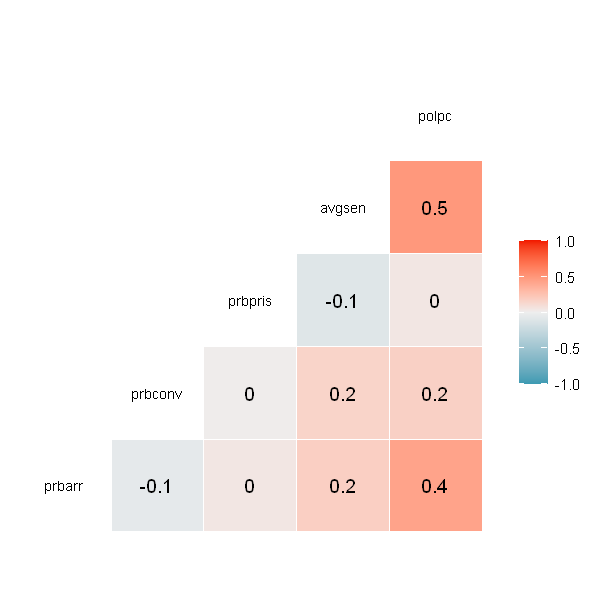

In [50]:
ggcorr(data[, c("prbarr", "prbconv", "prbpris", "avgsen", "polpc")], size = 3, label=TRUE)

**Correlation Analysis**

1. Interestingly, there is little correlation between the probability variables
2. There is weak positive correlation between prbconv and avgsen

**For now, we will consider all 3 probability variables in the model**

We expect that as any of probabilities of arrest or conviction or prison sentence go up, crime rate should come down (people would be less risk taking to commit crime if they knew they would be likely arrested / convicted / imprisoned). 

In [ ]:
# Finally there's nothing special about the avgsen and polpc variables.

# They have values within range and don't display special distributions
#summary(data$avgsen)
#hist(data$avgsen, breaks=100, main = "Histogram of avgsen", xlab = "avgsen", col = "lightblue", border = "black")

# Taking log10(avgsen) makes the histogram look slightly more normal, but we will use avgsen as is in the model for now.
# hist(log10(data$avgsen), breaks=100, main = "Histogram of avgsen", xlab = "avgsen", col = "lightblue", border = "black")

#summary(data$polpc)
#hist(data$polpc, breaks=100, main = "Histogram of polpc", xlab = "polpc", col = "lightblue", border = "black")

**There seem to be a few suspicious far right outliers for police per capita and average sentence days**

We will deal with them as appropriate when evaluating the cook's distance for potential points of influence.

We cannot make a judgement for the causal effect of polpc (police per capita). If this increases, we can make an argument that crimes may go down as there is "more policing" per citizen. We can also say, if polpc goes up, then crime rate goes up (police can find trivial reasons to arrest citizens - overpolicing).

We can however, likely say, if avgsen (average sentence in days) goes up, then convicts may become may learn their lessons and not commit crimes the next time around, so crime rate decreases. **In fact, we noticed a negative correlation between avgsen and prbconv, which may be capturing this hypothesis.**

**For now, we will include both variables, as is in the model specification**

### EDA Labor Market Variables

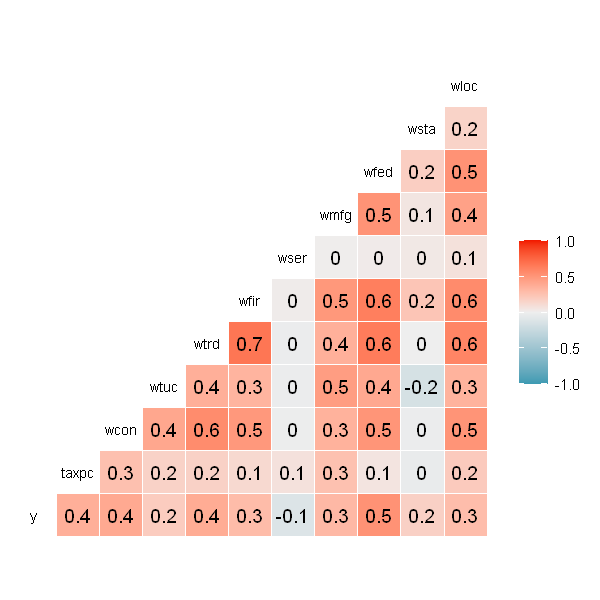

In [51]:
ggcorr(data[, c("y","taxpc", "wcon", "wtuc", "wtrd", "wfir", "wser", "wmfg", "wfed", "wsta", "wloc")], size = 3, label=TRUE)

As expected, due to labor and market interdependencies, a lot of the wages of workers in the city are correlated with others. Note that wages are positively correlated across all industries.

Note that while there is strong positive correlation (> 0.6), there is no perfect multicollinearity amongst these variables

Tax revenues are hardly correlated with any of the wages, this is a little surprising! Although we do see weak correlation between taxes and certain industries.

From this article: https://www.amherst.edu/media/view/121570/original/CornwellTrumbullCrime%2BElasticities.pdf

We find that these variables of wage represent **average** weekly wages of the industry

One variable of interest could be the total weekly wages:

**wtotal = wcon + wtuc + wtrd + wfir + wser + wmfg + wfed + wsta + wloc**

The argument is that if the total average weekly wages are high for a county, then the crime rate will be low (as the county is prosperous, so robberies and money related crimes would be fewer)

One may wonder if its valid to add wages and include this in the model. There are a few arguments for doing this:
1. Adding all wages shouldnt affect the regression because its the same effect as a linear combination of the betas of the individual industrial wages. In other words, the coefficient of wtotal is an aggregated version of the effect of each of the coefficients of the wage variables.
2. Adding all wages gives an idea of the overall economic condition of the county, which would affect crime rate of the county on aggregate
3. **Even if wages in 1 county were not distributed evenly amongst sectors (on average), but the total county is overall wealthy, that may be an argument to influence the policy makers to tax the rich!** Higher wage workers can be taxed more to provide services and benefit to the poorer wage workers in the county. If poor wage earners are now taken care of with the wealth and services from the government, there may be lesser incentive for crime in the county. This scenario is admittedly a little imaginative, but it is a plausible policy suggestion that could be put forward if wtotal is a significant variable in the model! 

There are a few caveats with this variable though:
1. Total average weekly wage in a county, while succinct, may be a controversial variable to include because individual wages are aggregated into a single number and may be hiding the effects of each individual industry. For example, consider wcon, wfir and wmfg variables. If in county1, the values are 100, 200, 300 and in county2, the values are 1, 2, 597. wtotal is the same for both counties, however, the breakdown shows that the workforce in county2 is on average poorer than county1, and thus susceptible to crime. 


In [52]:
data$wtotal = data$wcon + data$wtuc + data$wtrd + data$wfir + data$wser + data$wmfg + data$wfed + data$wsta + data$wloc

Total weekly wages is not unreasonably skewed in distribution (except for 5 outliers). More or less, each wage variable follows a normal distribution (as expected for population wages). **Hence, it is reasonable to use wtotal in our model.**

## 5. Model Building

Our target variable is log10(crmrate) - which is a scaled version of the log of crime rate. This gives us percentage increase of crime rate

We will build 3 model specifications that consist of one or more **classes** of variables:

1. Model1: Criminal Justice
2. Model2: Select variables our team thinks are important causes
3. Model3: Maximalist approach model with backward elimination / forward selection 

**We will use Adjusted R-Squared, AIC, BIC for criteria of model fit**

In [ ]:
dim(data)

### Demographic Variables Considered

**Geo variables**

1. geo
2. west_central
3. west_urban
4. central_urban
5. central
6. west
7. urban
8. non_urban_west_central

**Population variables**

9. log10_density
10. density_ymle (possibly, pctymle)
11. pctmin80

### Criminal Justice Variables Considered

All variables listed in the criminal justice category are considered without transformation
1. prbarr
2. prbconv
3. prbpris
4. avgsen
5. polpc

### Labor Market Variables Considered

1. wtotal
2. taxpc
3. Optionally, each industy's wage

Note that we have already run our models before and determined that one row (with ID 79) introduces very strong outlier tendencies, and has very strong influence (large cook's distance). **We will eliminate this row from consideration** because this single row has caused coefficients that were originally significant to become insignificant in on our previous model runs.

In [69]:
outlier_row = 79
data[outlier_row, ]
dim(data)

,county,year,crmrte,prbarr,prbconv,prbpris,avgsen,polpc,density,taxpc,...,geo,west_central,west_urban,central_urban,non_urban_west_central,density_min80,density_ymle,log10_density,y,wtotal
,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
79,173,87,0.0139937,0.4862317,0.154567,0.15,6.64,0.00316379,2.03422e-05,37.72702,...,0,0,0,0,0,5.165169e-06,1.518075e-06,-4.691602,-1.854067,2338.455


[1] 91 35

In [70]:
data = data[-outlier_row, ]
dim(data)

[1] 90 35

In [73]:
outlier_row = 83
data[outlier_row, ]
dim(data)

,county,year,crmrte,prbarr,prbconv,prbpris,avgsen,polpc,density,taxpc,...,geo,west_central,west_urban,central_urban,non_urban_west_central,density_min80,density_ymle,log10_density,y,wtotal
,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
84,185,87,0.0108703,0.1789937,1,0.442857,5.38,0.0012221,0.3887588,40.82454,...,0,0,0,0,0,0.2501593,0.02724506,-0.4103198,-1.963758,4463.683


[1] 90 35

In [74]:
data = data[-outlier_row, ]
dim(data)

[1] 89 35

In [75]:
outlier_row = 51
data[outlier_row, ]
dim(data)

,county,year,crmrte,prbarr,prbconv,prbpris,avgsen,polpc,density,taxpc,...,geo,west_central,west_urban,central_urban,non_urban_west_central,density_min80,density_ymle,log10_density,y,wtotal
,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
51,115,87,0.0055332,1,0.7071435,0.5,20.7,0.00905433,0.3858093,28.1931,...,0,0,0,0,0,0.004952441,0.02798466,-0.4136273,-2.257024,3129.748


[1] 89 35

In [76]:
data = data[-outlier_row, ]
dim(data)

[1] 88 35

### Model1 : Base Model

Model1 selects the following variables - log10(density), prbarr, prbconv, pctmin80, polpc

These are selected because these variables have the highest correlation with log10(crmrate) based on our correlation plots.




Warning message in cor(data, use = method[1], method = method[2]):
"the standard deviation is zero"

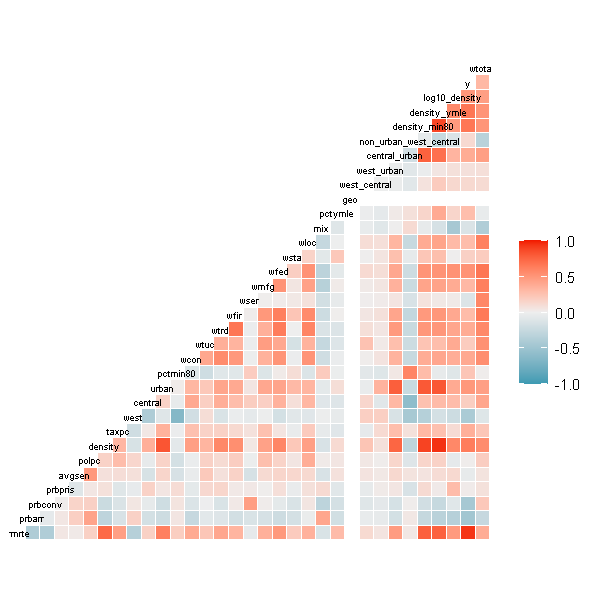

In [61]:
ggcorr(data[, 3:35], size = 2)

In [77]:
model1 = lm(y ~ log10_density + prbarr + prbconv + pctmin80 + polpc, data = data)

### Model2: Our Selected Model (Balanced Approach)

In [78]:
model2 = lm(y ~ prbarr + prbconv + polpc + log10_density + pctmin80 + pctymle + wcon + wtuc + wtrd + wfir + wser + wmfg + wfed + wsta + wloc, data=data)

In [79]:
# set model to be evaluated here

model = model2

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
-0.202717 -0.044344 -0.003193  0.000000  0.056039  0.243642 


	Shapiro-Wilk normality test

data:  m$residuals
W = 0.9865, p-value = 0.4977



	studentized Breusch-Pagan test

data:  m
BP = 35.174, df = 15, p-value = 0.002322


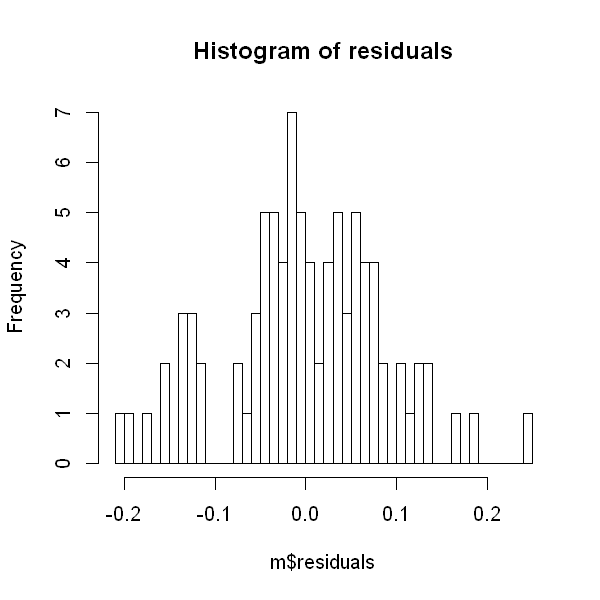

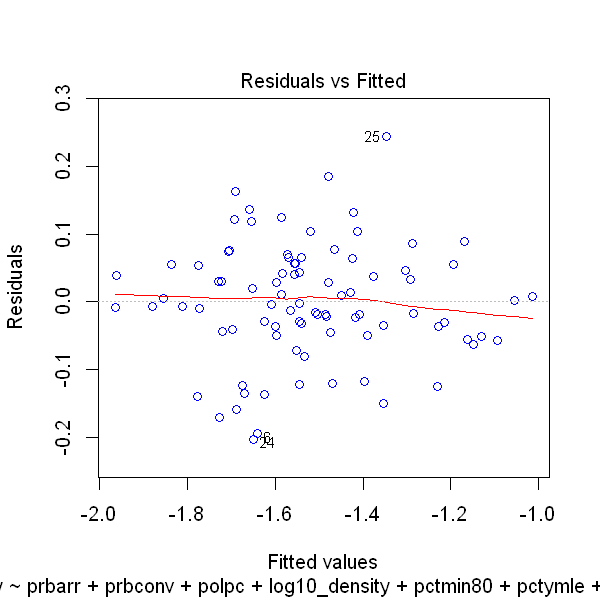

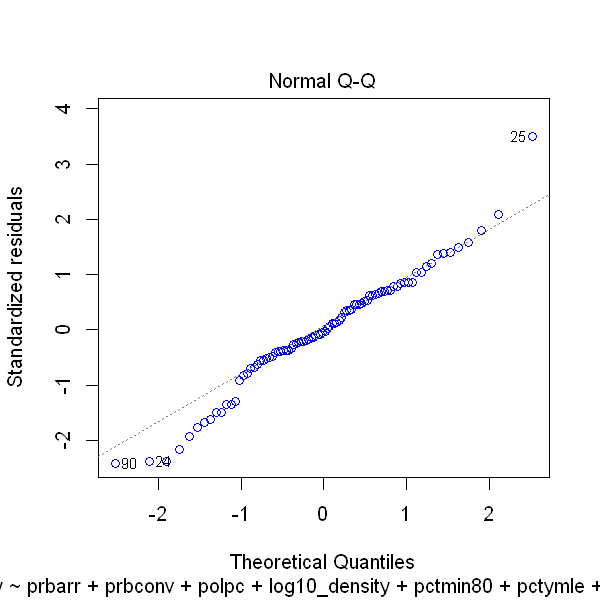

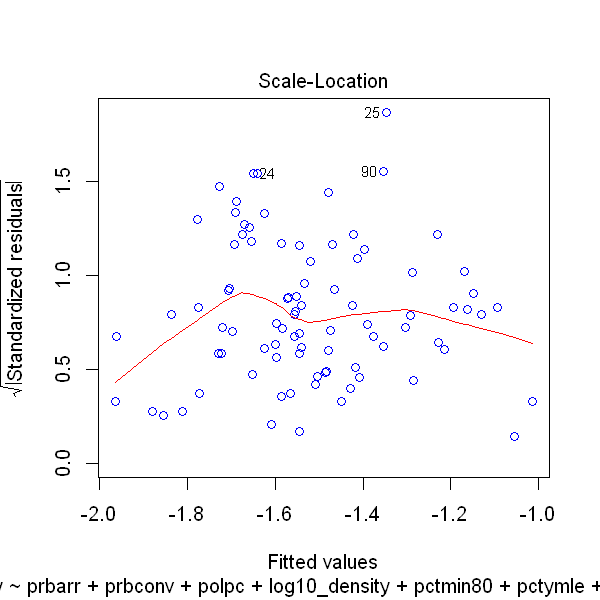

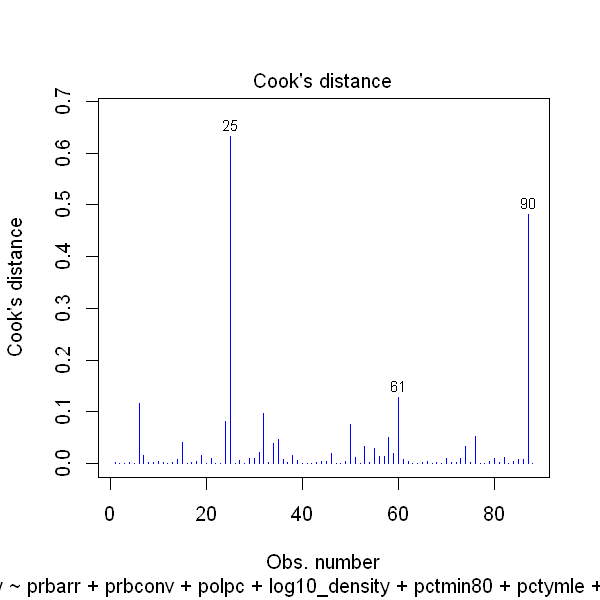

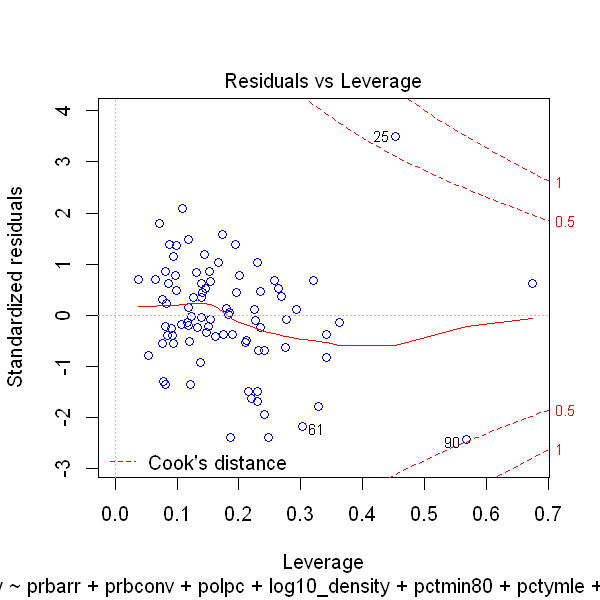

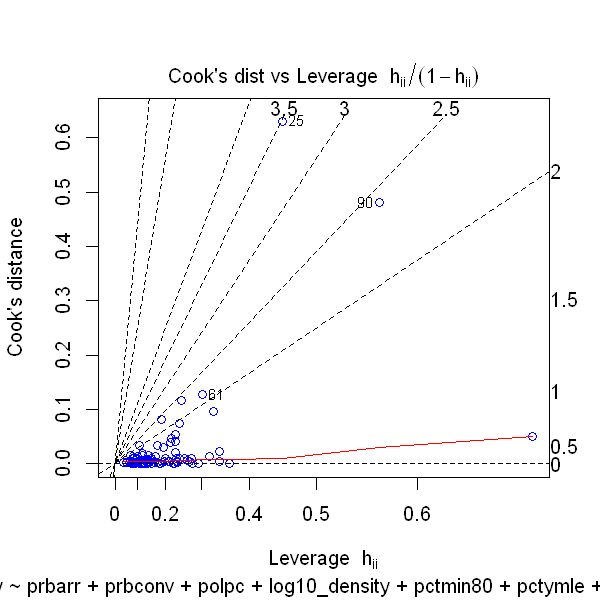

In [80]:
# We have kept all models linear in beta coefficients (MLR 1 satisfied for all models)
# Note that we assume data has been collected as IID (MLR 3 for all models)
evaluate_model_shapiro = function(m) {
    paste("Shapiro test on residuals - test for normality (MLR 6)")
    # null hypothesis is residuals are normally distributed
    shapiro.test(m$residuals)
}

evaluate_model_bp = function(m) {
    paste("Breusch Pagan test - test for heteroskedasticity (MLR 5)")
    # null hypothesis is homoskedasticity, alt is presence of heteroskedasticity
    bptest(m)
}


evaluate_model_plots = function(m) {

    paste("Plotting residuals - test for normality of errors (MLR 6)")
    hist(m$residuals, breaks=50, main = "Histogram of residuals")

    paste("Diagnostic plots (MLR 4,5 - Residual vs fitted), (MLR6 - QQ Plot), (MLR5 - Std. Residuals), (Cooks Dist - Outliers test)")
    #par(mfrow=c(3,3))
    plot(m, which=1:6, col = 'blue')
    
}

summary(model$residuals)
evaluate_model_shapiro(model)
evaluate_model_bp(model)
evaluate_model_plots(model)

In [81]:
# Always use heteroskedasticity robust std errors for beta values
# Get the coefficients for the variables in the model
coeftest(model, vcov = vcovHC)
summary(model)
AIC(model)
BIC(model)
vif(model)


t test of coefficients:

                 Estimate  Std. Error t value  Pr(>|t|)    
(Intercept)   -1.5483e+00  2.3621e-01 -6.5548 7.241e-09 ***
prbarr        -8.4451e-01  1.7588e-01 -4.8016 8.306e-06 ***
prbconv       -5.6900e-01  1.6821e-01 -3.3827 0.0011637 ** 
polpc          1.0245e+02  6.6327e+01  1.5446 0.1268172    
log10_density  2.7446e-01  7.3685e-02  3.7247 0.0003856 ***
pctmin80       5.4491e-01  7.7965e-02  6.9891 1.158e-09 ***
pctymle        7.3407e-01  5.8174e-01  1.2618 0.2110787    
wcon           2.5534e-04  3.2404e-04  0.7880 0.4332828    
wtuc           4.4074e-05  2.1189e-04  0.2080 0.8358132    
wtrd           2.3209e-04  5.1093e-04  0.4543 0.6510149    
wfir          -5.4651e-04  3.8483e-04 -1.4201 0.1598905    
wser          -6.7630e-04  4.5717e-04 -1.4793 0.1434143    
wmfg           6.3345e-06  1.3349e-04  0.0475 0.9622842    
wfed           5.3298e-04  4.0721e-04  1.3089 0.1947378    
wsta          -5.2163e-04  2.9106e-04 -1.7921 0.0773120 .  
wloc          


Call:
lm(formula = y ~ prbarr + prbconv + polpc + log10_density + pctmin80 + 
    pctymle + wcon + wtuc + wtrd + wfir + wser + wmfg + wfed + 
    wsta + wloc, data = data)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.202717 -0.044344 -0.003193  0.056039  0.243642 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)   -1.548e+00  2.015e-01  -7.685 5.93e-11 ***
prbarr        -8.445e-01  1.314e-01  -6.428 1.23e-08 ***
prbconv       -5.690e-01  8.729e-02  -6.518 8.44e-09 ***
polpc          1.025e+02  1.939e+01   5.283 1.30e-06 ***
log10_density  2.745e-01  5.348e-02   5.132 2.34e-06 ***
pctmin80       5.449e-01  6.758e-02   8.063 1.17e-11 ***
pctymle        7.341e-01  4.914e-01   1.494   0.1396    
wcon           2.553e-04  2.993e-04   0.853   0.3965    
wtuc           4.407e-05  1.645e-04   0.268   0.7895    
wtrd           2.321e-04  5.004e-04   0.464   0.6442    
wfir          -5.465e-04  3.065e-04  -1.783   0.0788 .  
wser          

[1] -149.4195

[1] -107.3048

prbarr       prbconv         polpc log10_density      pctmin80 
     1.595046      1.463445      1.286663      3.020278      1.229466 
      pctymle          wcon          wtuc          wtrd          wfir 
     1.316722      1.908910      1.467614      2.869463      2.686634 
         wser          wmfg          wfed          wsta          wloc 
     2.528236      1.718905      2.895837      1.471891      2.302883

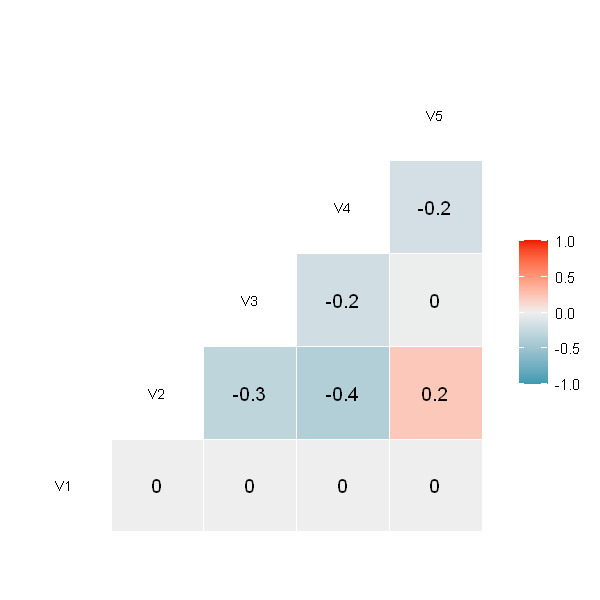

In [84]:
exodata = cbind(model$residuals, data$prbarr, data$prbconv, data$log10_density, data$pctmin80)
ggcorr(exodata, size = 3, label=TRUE)

### Causality Criteria

We notice that the residuals mean is 0.
We also notice that the correlation between the residuals and the "significant" model variables is 0 for all variables (see last row in the above correlation matrix plot). 

**Hence, we can say that the exogeneity assumption is satisfied and hence, the effect of our model specification is causal**


### Model3: Maximalist approach model with backward elimination / forward selection

In [88]:
model3 = lm(y ~ . , data = data)
#summary(model3)

#step(model3, direction = "backward")
formula(model3)
#par(mfrow=c(2,3))
#plot(model3, which=1:6, col = 'blue')

y ~ county + year + crmrte + prbarr + prbconv + prbpris + avgsen + 
    polpc + density + taxpc + west + central + urban + pctmin80 + 
    wcon + wtuc + wtrd + wfir + wser + wmfg + wfed + wsta + wloc + 
    mix + pctymle + geo + west_central + west_urban + central_urban + 
    non_urban_west_central + density_min80 + density_ymle + log10_density + 
    wtotal

In [95]:
model_fit_start <- lm(y ~ 1 , data = data)
summary(model_fit_start)

step(model_fit_start, direction = "forward", scope = formula(model3))
formula(model_fit_start)
#par(mfrow=c(2,3))
#plot(model_fit_start, which=1:6, col = 'blue')

model_fit_start <- lm(y ~ 1 , data = data)
summary(model_fit_start)

step(model_fit_start, direction = "both", scope = formula(model3))
formula(model_fit_start)

#par(mfrow=c(2,3))
#plot(model_fit_start, which=1:6, col = 'blue')


Call:
lm(formula = y ~ 1, data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.45116 -0.12543 -0.00001  0.13407  0.51807 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.52258    0.02354  -64.67   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.2209 on 87 degrees of freedom


Start:  AIC=-264.8
y ~ 1

                         Df Sum of Sq    RSS     AIC
+ crmrte                  1    3.8645 0.3793 -475.31
+ density_min80           1    1.9797 2.2642 -318.09
+ density_ymle            1    1.9582 2.2856 -317.26
+ log10_density           1    1.9369 2.3069 -316.45
+ density                 1    1.7465 2.4974 -309.46
+ wfed                    1    1.1798 3.0641 -291.47
+ polpc                   1    1.1578 3.0860 -290.84
+ urban                   1    1.1236 3.1203 -289.87
+ wtotal                  1    0.9874 3.2564 -286.11
+ wloc                    1    0.6965 3.5474 -278.58
+ central_urban           1    0.6733 3.5705 -278.01
+ west                    1    0.6329 3.6110 -277.02
+ wtrd                    1    0.6156 3.6282 -276.60
+ prbarr                  1    0.5888 3.6550 -275.95
+ taxpc                   1    0.5827 3.6611 -275.80
+ prbconv                 1    0.5435 3.7003 -274.87
+ wmfg                    1    0.5076 3.7362 -274.02
+ wser              


Call:
lm(formula = y ~ crmrte + urban + wfed + west_urban + west + 
    taxpc + central_urban + density_min80 + log10_density + pctmin80 + 
    wser + wcon + mix + wfir + prbarr + wmfg + county + wtotal, 
    data = data)

Coefficients:
  (Intercept)         crmrte          urban           wfed     west_urban  
   -1.943e+00      1.226e+01     -6.565e-02      2.421e-04      6.806e-02  
         west          taxpc  central_urban  density_min80  log10_density  
   -1.420e-02     -4.483e-04      1.576e-01     -2.555e-01      2.119e-01  
     pctmin80           wser           wcon            mix           wfir  
    3.181e-01      5.311e-04     -8.257e-05      1.943e-01     -1.212e-04  
       prbarr           wmfg         county         wtotal  
   -9.630e-02      1.907e-04      1.204e-04     -7.918e-05  


y ~ 1


Call:
lm(formula = y ~ 1, data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.45116 -0.12543 -0.00001  0.13407  0.51807 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.52258    0.02354  -64.67   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.2209 on 87 degrees of freedom


Start:  AIC=-264.8
y ~ 1

                         Df Sum of Sq    RSS     AIC
+ crmrte                  1    3.8645 0.3793 -475.31
+ density_min80           1    1.9797 2.2642 -318.09
+ density_ymle            1    1.9582 2.2856 -317.26
+ log10_density           1    1.9369 2.3069 -316.45
+ density                 1    1.7465 2.4974 -309.46
+ wfed                    1    1.1798 3.0641 -291.47
+ polpc                   1    1.1578 3.0860 -290.84
+ urban                   1    1.1236 3.1203 -289.87
+ wtotal                  1    0.9874 3.2564 -286.11
+ wloc                    1    0.6965 3.5474 -278.58
+ central_urban           1    0.6733 3.5705 -278.01
+ west                    1    0.6329 3.6110 -277.02
+ wtrd                    1    0.6156 3.6282 -276.60
+ prbarr                  1    0.5888 3.6550 -275.95
+ taxpc                   1    0.5827 3.6611 -275.80
+ prbconv                 1    0.5435 3.7003 -274.87
+ wmfg                    1    0.5076 3.7362 -274.02
+ wser              


Call:
lm(formula = y ~ crmrte + taxpc + central_urban + density_min80 + 
    log10_density + pctmin80 + wser + wcon + wsta + polpc + density_ymle + 
    mix + prbarr + prbpris + prbconv, data = data)

Coefficients:
  (Intercept)         crmrte          taxpc  central_urban  density_min80  
   -1.8004639     11.8918422     -0.0008986      0.1334643     -0.2435457  
log10_density       pctmin80           wser           wcon           wsta  
    0.2595455      0.3752123      0.0003630     -0.0001718     -0.0002108  
        polpc   density_ymle            mix         prbarr        prbpris  
   18.4774263     -0.2106980      0.1573846     -0.1781861     -0.1032505  
      prbconv  
   -0.0737076  


y ~ 1

In [ ]:
#############################
#Varibale Selection Process
`
##############################
#Backward Elimination - stepsize regression
##############################

#Start will all the variables
model_fitall <- lm(y ~ . , data = data)
summary(model_fitall)

step(model_fitall, direction = "backward")
formula(model_fitall)
par(mfrow=c(2,3))
plot(model_fitall, which=1:6, col = 'blue')


#Call:
#lm(formula = crmrte ~ prbarr + prbconv + polpc + density + taxpc +
#    central + pctmin80 + wcon + wfir + wfed + wsta + pctymle, data = CrimeData3)
#AIC = AIC=-868.08

##############################
#Forward Selection - stepsize regression
##############################

#Start with intercept only
model_fit_start <- lm(crmrte ~ 1 , data = CrimeData3)
summary(model_fit_start)

step(model_fit_start, direction = "forward", scope = formula(model_fitall))
formula(model_fit_start)
par(mfrow=c(2,3))
plot(model_fit_start, which=1:6, col = 'blue')

#Call:
#  lm(formula = crmrte ~ density + west + prbconv + central + prbarr +
#       polpc + pctmin80 + wcon + mix + wsta + pctymle + taxpc, data = CrimeData3)
# AIC=-867.61

##############################
#Both Steps:
##############################

#Start with intercept only
model_fit_start <- lm(crmrte ~ 1 , data = CrimeData3)
summary(model_fit_start)

step(model_fit_start, direction = "both", scope = formula(model_fitall))
formula(model_fit_start)

par(mfrow=c(2,3))
plot(model_fit_start, which=1:6, col = 'blue')

#Call:
#lm(formula = crmrte ~ density + prbconv + prbarr + polpc + pctmin80 +
#     mix + wsta + pctymle + taxpc, data = CrimeData3)
# AIC=-869.3

# Model Selection and Multi-model Inference: A Practical Information-theoretic Approach
#(Burnham and Anderson, 2004), particularly on page 62 (section 2.2):
#Usually, AIC is positive; however, it can be shifted by any additive constant,
#and some shifts can result in negative values of AIC. Computing AIC from
#regression statistics (see Section 1.2.2) often results in negative AIC values. In
#our work, we have seen minimum AIC values that range from large negative
#numbers to as high as 340,000. It is not the absolute size of the AIC value,
#it is the relative values over the set of models considered, and particularly
#the differences between AIC values (Section 2.5), that are important.
##############################
#Backward stepsize regression
##############################


### Model Selection

We decided to select a model with these variables because of a combination of reasons. 
1. We found that this model had a number of variables that align well with our intuition of what typically may affect crime rate. Variables of criminal justice, along with some demographic variables are known in literature to influence crime rate.
2. We ran the model with labor market variables, including individual industry average wages. We found only wfir and wsta had statistical significance, but very little practical significance (beta values were very small) - so we determined labor market variables dont contribute much in influencing crime rate. When included in the model, we saw our homoskedastic assumptions and normality of error assumptions also getting satisfied. Hence, it is possible that while labor market variables dont individually influence crime rate, they could have "joint significance".
3. From a policy perspective, these are the interesting variables for us. We do have some suggestions we can make around controlling for policing activity, or controlling for density and demography. Hence, it makes sense to include these variables.
4. **According to our backward stepwise selection approach, these variables showed significance.**

### Model Analysis

We notice that we have coefficients and std. errors from heteroskedastic robust methods (White-Huber)

We also have our regular std. errors from the summary command.

**Note that the Breusch Pagan test shows presence of homoskedasticity (null hypothesis failed to be rejected)**

**The Shapiro test shows that errors are normally distributed (at the 5% significance level).**

We notice there are a few factors that are associated with the crime rate percentage (target is log(crmrate)):
1. **Probability of Arrest (prbarr)** - this is fairly obvious. It has a negative coefficient, meaning that when probability of arrest goes up, crime rate percentage goes down - likely because criminals reconsider doing the crime, when they know they have a high chance of getting arrested. This variable is significant in both methods of coefficient calculation.
2. **Percentage of Minority (pctmin80)** - the model shows that as minorities increase in a county, so does crime. This variable is significant in both modes of coefficient calculation. What may be an interesting discussion is to find out whether the minorities are victims of crime, thus leading to higher crime rate OR are minorities the perpetrators of crime, thus leading to higher crime rate?
3. **Density (log10_density)** - as density goes up, crime rate goes up. This is consistent with our originally stated hypothesis - crowded regions have more chance for conflict and more chance of crime.
4. **Police per Capita (polpc)** - as police per capita goes up, so does crime. Note that the coefficient is very large for this variable, indicating this variable has practical significance! This may indicate that there is overpolicing going on, leading to higher arrests and more crime.
5. **Percentage of Young Males (pctymle)** - while the density_ymle was NOT significant, pctymle is significant at the 5% level. As young males increase in a county, crime goes up, which makes intuitive sense because young males indulge in crime. 

While few wage variables have statistical significance, there is very little practical significance. It will be good to do a study on their joint significance.

Model fit metrics are looking good. Adjusted R squared is around 83% and AIC / BIC scores are negative (interesting to note).

Meaning of negative AIC or BIC: 

https://www.reddit.com/r/AskStatistics/comments/5ydt2c/if_my_aic_and_bic_are_negative_does_that_mean/

https://stat.ethz.ch/pipermail/r-help/2005-April/069550.html

In [ ]:
# finally plot the models and compare models with stargazer 
se_model8 = sqrt(diag(vcovHC(model8_select)))
se_model6 = sqrt(diag(vcovHC(model6_cj)))
stargazer(model8_select, model6_cj, type = "text", omit.stat = "f",
         se = list(se_model8, se_model6),
         star.cutoffs = c(0.05, 0.01, 0.001))

We decided to compare the criminal justice only model (model6_cj) against the selected model chosen by the team (model8_select). This is because in our all our models, the criminal justice variables were significant, so there definitely is a contribution of criminal justice variables on crime rate. 

We wanted to see, that in addition to criminal justice variables, what additional variability are we able to explain adding variables around demographics + wage.

We notice that our model has a superior adjusted R-Squared value (83% vs 52%). We also notice that the criminal justice only model has polpc and prbarr as significant variables. Note that the coefficient for polpc is naturally higher in model6_cj because of the omitted variables that are biasing the value of beta.

## Assumptions of Multiple Linear Regression

1. Parameters are linear
2. No perfect multicollinearity
3. IID / Random sample of observations in dataset
4. Zero conditional mean, ie, E[u|X] = 0 (or weaker assumption of exogeneity, E(u) = 0 and Cov(X, u) = 0)
5. Homoskedastic errors, Var(u|X) = const
6. Normality of errors ~ N(0, sigma^2)

MLR 1-4 implies unbiased OLS estimators (beta coefficients) <br/>
MLR 1-5 (Gauss markov) implies OLS estimators are BLUE <br/>
MLR 1-6 (Classical LM assumptions) implies OLS estimators, ie, beta_j ~ N(beta_j, var(beta_j)) - var(beta_j) given by white standard errors

### MLR assumptions for Select Model 8
1. **MLR 1 - linear in parameters** is satisfied for all models based on our EDA between our target variable and explanatory variables. 
2. There is **no PERFECT multicollinearity** in the data as we have omitted variables that could have potentially shown high correlation. Also VIF score for all explanatory variables < 4. **Hence MLR 2 is also satisfied.**
3. The data is assumed to be collected as IID (this can be assumed from the study). The authors of the study that produced this data claimed to meet this assumption (sampling method). The fact that our data consists of a slice of this data from a study may suggest that we cannot say this assumption is met. For example, it is possible that the residuals from a single year (which is the case for our dataset) might not be IID. If there is some change in these data over time, having temporal data would allow us to investigate this possibility. The geographic proximity of these counties in North Carolina further complicates our ability to assert that our residuals are IID. The authors of the original study employed advanced methods to correct for this problem. As these methods are beyond the scope of this class, we can only note that this assumption is not met. **Hence, MLR 3 criteria is assumed to be satisfied.**
4. Looking at the residuals vs fitted values plot, **MLR 4 (Zero Conditional mean) is satisfied.** The zero conditional mean line does slope downwards on extremities, however, this could be due to lack of sufficient data points.
5. The Breusch Pagan test shows us that the variance of errors is homoskedastic (at the 95% signifcance level). This is also confirmed from the std. residuals plot. **This shows us that MLR 5 (homoskedasticity) is satisfied.**
6. The QQ norm plot and residual histogram plot for errors shows that errors do follow an approximate normal distribution. We also calculate the mean of errors to show that we have zero residual mean. However, there are some clear outliers represented in the data (skewed towards the lower end). **This shows that MLR 6 (normality of errors) is also satisfied.**
7. Because we have 80 data points (> 30), we can rely on the **law of asymptotics (CLT)** to say that even if MLR 6 is not completely satisfied, the coefficients are normally distributed with unbiased true population parameter value as mean and variance given by White-Huber standard errors, ie, betaj_hat ~ N(beta_j, var(beta_j)). 

### Outliers
1. We notice that there are a few outliers in our data.
2. These also show up in the QQ plot as well as the Cooks distance plot (having cook's dist close to 1). However, we will include these in our model because its not much larger than 1.
3. **Note that we removed row 79 which had an extremely large cook's distance and was causing problems in the model.**

### Omitted Variables

We pick 3 county wide variables as omitted variables:
1. Drug_Pct - the percentage of people in the county using drugs
2. Unemployment_Pct - the percentage of unemployed people
3. Education_Years - the average number of years of education in the county

We expect Drug_Pct to be positively correlated with crime rate.
We expect Unemployment_Pct to be positively correlated with crime rate.
We expect Education_Years to be negatively correlated with crime rate.

For the omitted variable bias, we need to consider our modified beta values:

betaj_hat = betaj_pop + beta_omitted * delta

where betaj_hat is off from the population betaj by a factor of **beta_omitted * delta** 

**Let us say our jth variable is prbarr**

In the case of (say) Education_Years, 
1. beta_omitted is negative (Education_Years should be negatively correlated with crime rate) 
2. delta is negative (prbarr should be negatively correlated with Education_Years)

Hence, beta_omitted * delta is positive. Hence, betaj_hat is larger than betaj_pop. This means that we have **underestimated the effect of prbarr by omitting Education_Years from our model**. We say underestimated because coefficient for prbarr is negative and we add a positive value (beta_omitted * delta) to it. So we have drawn the coefficient for prbarr closer to 0. If Education_Years was included, then prbarr coefficient would have been further away from 0 in the negative direction.

## Conclusion

Crime in North Carolina clearly has a complex set of root causes and effects but here we can draw a few
conclusions that could help potentially drive several policy initiatives to reduce the crime rate in many counties.
The first set of policy initiatives we would suggest would be around strengthening certain aspects of the criminal
justice system.

First we would suggest Increasing the ability of counties to detect and respond to a crime so that the probability of
an arrest when a crime is committed is high could have a promising impact on the crime rate. Communicating
those efforts to the communities may help alerting citizens to the se increased efforts may acts a deterrent. In
addition, putting more resources in place to aid the processes required to enable a conviction such as more county
and local prosecutors could reduce crime as there is also a fairly clear relationship between the probability of
conviction and a lower crime rate. In short stronger deterrents on the early stages of the criminal justice appear to
have an stronger relationship to a lower crime rate.

Second, population demographics are clearly at play here. We found a relationship between a dense population
with higher percentages of young males and minorities correlated with a higher crime rate. Policy initiative directed
at after school programs, for young males, programs targeted to enable minorities to achieve, particularly in the
city may divert potential criminal activity into more productive activities with life long benefits, avoiding the stigma
of a criminal record for many.

Third, economics play a role in the crime rate. Further study into degree to which both wealth and wages in
different sectors of the population is merited. While we see a relationship between wages in certain sectors,
building out this analysis with more data around wealth, such as the level of assets in a county, how many families
own homes and the level and access to higher education would make such as study more fruitful.
There are several aspects of further study that could be potentially improved by further investigation. These
include but are not limited to the inclusion of temporal data and investigation of other criteria for a choice of full
model beyond cross validation.

North Carolina has a diverse population from coastal communities passing through Charlotte and the Research
Triangle to the Appalachian Mountains. Tailoring policies by region motivated by the economic and justice systems
results here could bring greater peace and deter crime for all.

## Appendix



In [ ]:
ggcorr(data, size = 2)